## Исследование данных о российском кинопрокате



**Исследование данных о российском кинопрокате**

1. Заказчик - Минкульт РФ. 
Нужно изучить рынок российского кинопроката и выявить текущие тренды, а также уделить внимание фильмам, которые получили государственную поддержку.
2. Для исследования данных предоставлены два датасета, в которых содержится информация о фильмах(жанр, режиссер и т.д.)
3. План: 
- Открыть файлы и объединить их в один датафрейм
- Предобработка данных (проверить типы данных, изучить пропуски, проверить на наличие дубликатов, изучить категориальные и количественные значения и добавить новые столбцы)
- Исследовательский анализ данных (Посмотреть сколько фильмов выходило каждый год, изучить как менялась динамика прокатов, посчитать среднюю и медианную сумму сборов, определить влияет ли возраст на сумму сборов)
- Ищем различные закономерности
- Общий вывод

### Шаг 1. Откроем файлы с данными и объединим их в один датафрейм

In [2]:
#Добавляем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Знакомимся с первым датасетом
movies = pd.read_csv('/datasets/mkrf_movies.csv')
display(movies)
movies.info()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер"
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [4]:
#Знакомимся со вторым датасетом
shows = pd.read_csv('/datasets/mkrf_shows.csv')
display(shows)
shows.info()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
...,...,...
3153,224014814,1.530000e+03
3154,224021411,9.270000e+03
3155,224022410,4.000000e+02
3156,224023210,3.600000e+02


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [5]:
#Заменяем значение "нет" на 0, т.к. оно мешает нам поменять тип данных
movies.loc[movies['puNumber'] == 'нет', 'puNumber'] = 0

In [6]:
#Меняем тип данных на int
movies['puNumber'] = movies['puNumber'].astype('int')

In [7]:
#Объединяем данные и выводим их
mkrf_movies = movies.merge(shows, on='puNumber', how ='left')
display(mkrf_movies)
mkrf_movies.info()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**Вывод:** Ознакомились с данными; Заменили значения, мешавшие объединению данных; Ознакомились с новыми данными

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверим типы данных в датафрейме и преобразуем их

In [8]:
#Приводим столбец 'show_start_date' к правильному типу и проверяем
mkrf_movies['show_start_date']= pd.to_datetime(mkrf_movies['show_start_date'], format='%Y-%m-%dT%H:%M:%S')
mkrf_movies['show_start_date']

0      2015-11-27 12:00:00+00:00
1      2016-09-13 12:00:00+00:00
2      2016-10-10 12:00:00+00:00
3      2016-06-10 12:00:00+00:00
4      2015-07-29 12:00:00+00:00
                  ...           
7481   2019-12-23 12:00:00+00:00
7482   2019-12-24 12:00:00+00:00
7483   2019-12-28 12:00:00+00:00
7484   2019-12-30 12:00:00+00:00
7485   2019-12-30 12:00:00+00:00
Name: show_start_date, Length: 7486, dtype: datetime64[ns, UTC]

In [9]:
#В столбце 'ratings' видим процентные данные. Скорее всего была допущена ошибка при заносе данных.
#Удалим знак процента
mkrf_movies['ratings'] = mkrf_movies['ratings'].str.replace('%','')

In [10]:
#Меняем тип данных
mkrf_movies['ratings'] = mkrf_movies['ratings'].astype('float64')

In [11]:
#Проверяем уникальные значения, все ли значения заменили
mkrf_movies['ratings'].unique()

array([ 7.2,  6.6,  6.8,  7.7,  8.3,  8. ,  7.8,  8.1,  7.1,  6. ,  7.4,
        5.8,  8.7,  6.3,  6.9,  5. ,  4.3,  7.3,  7. ,  6.4,  nan,  8.2,
        7.5,  6.7,  7.9,  5.9,  6.2,  5.6,  6.5,  2.4,  7.6,  6.1,  8.6,
        8.5,  8.8,  5.5,  5.1,  5.7,  5.4, 99. ,  4.4,  4.5,  5.3,  4.1,
        8.4,  2.6,  3.8,  4.6,  4.8,  4. ,  3. ,  1.6,  4.2,  5.2,  4.7,
        4.9,  3.9,  2.7,  3.3,  2.9, 28. ,  3.7,  1.4,  3.1, 97. ,  3.5,
        3.2,  2.8,  1.5,  2.1,  2.5,  9.2,  3.4,  1.1,  3.6, 83. , 64. ,
       91. , 94. , 62. , 79. , 90. , 19. , 88. ,  1. , 89. ,  1.3,  1.9,
        1.8,  1.2,  1.7,  9. , 98. ,  8.9,  9.1])

In [12]:
#Оставшиеся значения больше 10 приводим к правильному виду
mkrf_movies.loc[mkrf_movies['ratings'] > 10, 'ratings'] = mkrf_movies['ratings'] / 10

In [13]:
#Проверяем, разделились ли значения
mkrf_movies['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

In [14]:
#Заменяем значения нан на медианные
mkrf_movies['ratings'].fillna(mkrf_movies['ratings'].median(), inplace=True)

In [15]:
#Проверяем
mkrf_movies['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, 8.2, 7.5, 6.7, 7.9, 5.9, 6.2,
       5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4, 9.9,
       4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6, 4.2,
       5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7, 3.5,
       3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9, 1. ,
       8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясним, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [16]:
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

**Посмотрим на пропуски:**
1. film_studio - 18 пропусков
2. production_country - 2 пропуска
3. director - 9 пропусков
4. producer - 568 пропусков
5. refundable_support, nonrefundable_support, budget, financing_source - данные столбцы имеют множество пропусков, тут скорее не ошибка, ведь гос.поддержка выделяется не на все фильмы.
6. genres - 976 пропусков
**Рассмотрим данные столбцы**

In [17]:
#Рассмотрим пропущенные значения в film_studio
mkrf_movies[mkrf_movies['film_studio'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.3,комедия,NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
6105,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,NaN,NaN
6181,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,NaN,NaN
6379,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.6,NaN,NaN
6380,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.6,NaN,NaN
6399,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.6,NaN,41225.0
6485,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.9,"драма,криминал,детектив",NaN
6494,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00+00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.6,NaN,NaN
6497,Мой папа Чингисхан,112014918,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.6,NaN,NaN


**Вывод:** Не думаю, что тут есть какие-либо ошибки, больше похоже на то, что данные фильмы снимались не студией, а самими авторами. Однако же из всех строк выбивается "Мульт Личности. Выпуск 5", данная передача выходила на первом канале, можно здесь заменить значение, но не думаю, что это сыграет большую роль.

In [18]:
mkrf_movies.loc[4441, 'film_studio'] = '1Канал'

In [19]:
#Рассмотрим пропущенные значения в production_country
mkrf_movies[mkrf_movies['production_country'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,1Канал,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


**Вывод:** Здесь все проще, данные фильмы были выпущены в России, заменим пустые значения

In [20]:
mkrf_movies.loc[3186, 'production_country'] = 'Россия'
mkrf_movies.loc[4441, 'production_country'] = 'Россия'

**Вывод:** Оставшиеся столбцы оставим без изменений, т.к. при дальнейшем анализе они не сыграют важной роли.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверим, есть ли в данных дубликаты. Опишем причины, которые могли повлиять на появление дублей.

In [21]:
#Проверим на наличие дубликатов
mkrf_movies.duplicated().sum()

0

In [22]:
#Проверим столбец puNumber на дубликаты. Видим, что присутствует 2 значения.
mkrf_movies['puNumber'].duplicated().sum()

2

In [23]:
#Удалим дубликаты
mkrf_movies = mkrf_movies.drop_duplicates(subset=['puNumber'])
mkrf_movies['puNumber'].duplicated().sum()

0

In [24]:
#Проверим столбец title на дубликаты
mkrf_movies['title'].duplicated().sum()

713

In [25]:
#Ознакомимся с дубликатами
mkrf_movies[mkrf_movies['title'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.1,"драма,спорт",NaN
26,Оружейный барон,221012515,2015-04-03 12:00:00+00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.7,"боевик,драма,криминал",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.5,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"комедия,приключения,детектив",NaN
7438,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.5,"триллер,драма",175003.51
7450,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"триллер,криминал,детектив",NaN


**Вывод:** 
- Полных дубликатов не обнаружилось; 
- В столбце "puNumber" присутствовало 2 дубликата, скорее всего ошибка, т.к. номер прокатного удостоверения уникален;
- В столбце "title" можно заметить, что некоторые фильмы выпускались в прокат несколько раз, не будем их трогать.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрим, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправим проблемные значения в поле `type`.

In [26]:
#Исправляем проблемные значения в поле type
mkrf_movies['type'].str.strip()

0       Художественный
1       Художественный
2       Художественный
3       Художественный
4       Художественный
             ...      
7481            Прочие
7482    Художественный
7483    Художественный
7484      Анимационный
7485      Анимационный
Name: type, Length: 7484, dtype: object

In [27]:
#Ознакомимся с уникальными значениями других категориальных столбцов
mkrf_movies['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [28]:
mkrf_movies['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

**Вывод:** 
- В столбце type исправили проблемные значения; 
- В других столбцах видна закономерность в том, что имеются повторояющиеся значения, которые нельзя заменить.

#### Шаг 2.5. Проверьте количественные значения

- Проверим, обнаружились ли в таких столбцах подозрительные данные.

In [29]:
#Обнулим пропуски
mkrf_movies['budget'].fillna(0)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7481    0.0
7482    0.0
7483    0.0
7484    0.0
7485    0.0
Name: budget, Length: 7484, dtype: float64

**Вывод:** В данном случае правильным будет заменить пустые значения на 0, т.к. по 332 заполненным значениям не возможно заполнить оставшиеся или сделать масштабный вывод.

#### Шаг 2.6. Добавьте новые столбцы





- Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [30]:
#Создаем столбец с информацией о годе проката
mkrf_movies['year'] = mkrf_movies['show_start_date'].dt.year

- Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [31]:
#Создаем функцию
def col(mkrf_movies, columns):
    for column in columns:
        mkrf_movies[f'col_{column}'] = mkrf_movies[column].dropna().apply(lambda x: x.split(',')[0])
    return mkrf_movies
mkrf_movies = col(mkrf_movies, ['director', 'genres'])
mkrf_movies

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,col_director,col_genres
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.6,NaN,NaN,2019,Фил Грабски,NaN
7482,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN,2019,Ник Пауэлл,боевик
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.6,NaN,NaN,2019,Чарльз Е.Бастьен,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.6,NaN,NaN,2019,А.Беляев,NaN


- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [32]:
#Создадим новый столбец с долей гос.поддержки и введем переменную с медианными значениями
mkrf_movies['Share'] = (mkrf_movies['refundable_support'] + mkrf_movies['nonrefundable_support']) / mkrf_movies['budget']
share = mkrf_movies['Share'].median()
print('Доля государственной поддержки составляет:', share)

Доля государственной поддержки составляет: 0.6140376284219444


### Шаг 3. Проведите исследовательский анализ данных


- Посмотрим, сколько фильмов выходило в прокат каждый год. 
- Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

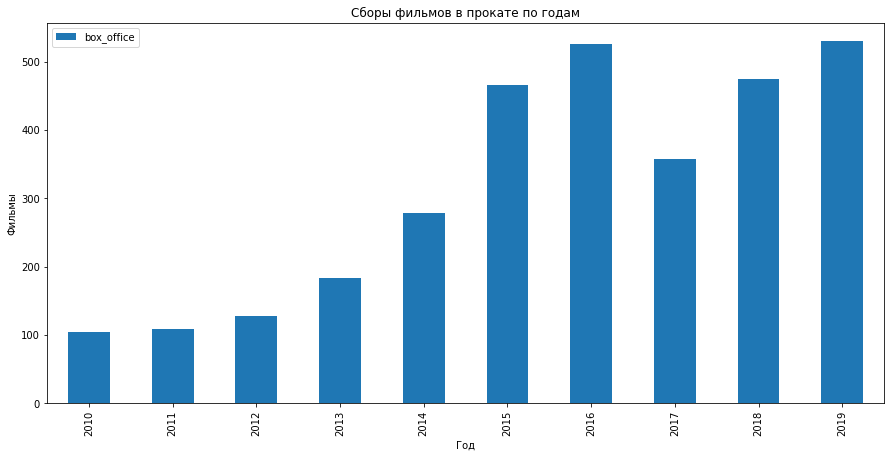

Долю фильмов с информацией о прокате в кинотеатрах составляет: 0.4219668626402993


In [33]:
#Выводим график с фильмами за год, а также считаем долю
(
    mkrf_movies.pivot_table(index = 'year', values = 'box_office', aggfunc = 'count')
    .plot(title='Cборы фильмов в прокате по годам', kind='bar', grid = False, figsize=(15,7))
)
plt.xlabel('Год')
plt.ylabel('Фильмы')
plt.show()
print('Долю фильмов с информацией о прокате в кинотеатрах составляет:',mkrf_movies['box_office'].notna().mean())

**Вывод:** 
- Наибольшее количество вышедших фильмов в 2019 году, наименьшее количество в 2010 году;
- В 2017 году произошел спад и с каждым следующим годом количество фильмов снова возрастало.

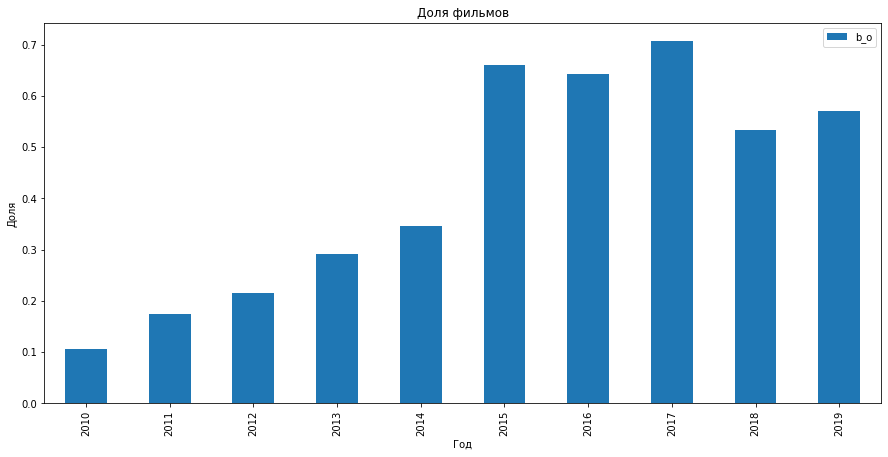

In [34]:
mkrf_movies['b_o'] = mkrf_movies['box_office'].notna()
(
    mkrf_movies.pivot_table(index = 'year', values = 'b_o', aggfunc = 'mean')
    .plot(title='Доля фильмов', kind='bar', grid = False, figsize=(15,7))
)
plt.xlabel('Год')
plt.ylabel('Доля')
plt.show()

**Вывод:** В период с 2010 по 2014 доля была наименьшая, в 2017 же наибольшая.

- Изучим, как менялась динамика проката по годам.

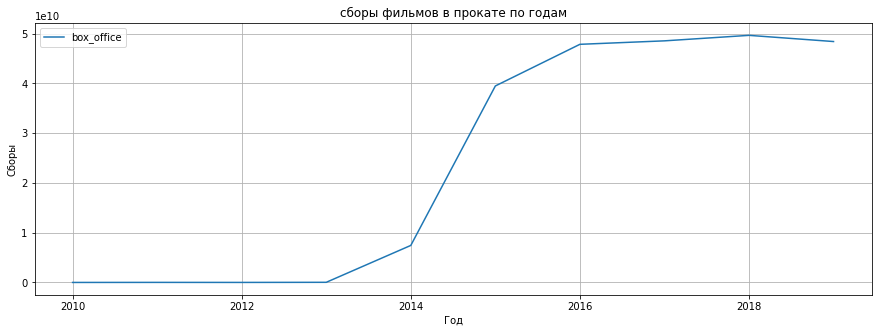

In [35]:
#Выводим график динамики проката по годам
(
    mkrf_movies.pivot_table(index = 'year', values = 'box_office', aggfunc = 'sum')
    .plot(title='сборы фильмов в прокате по годам', kind='line', grid = True, figsize=(15,5))
)
plt.xlabel('Год')
plt.ylabel('Сборы')
plt.show()

**Вывод:** 
- В 2010-2013 годах сумма сборов была минимальной; 
- В 2018 году сумма сборов была максимальной.

- С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

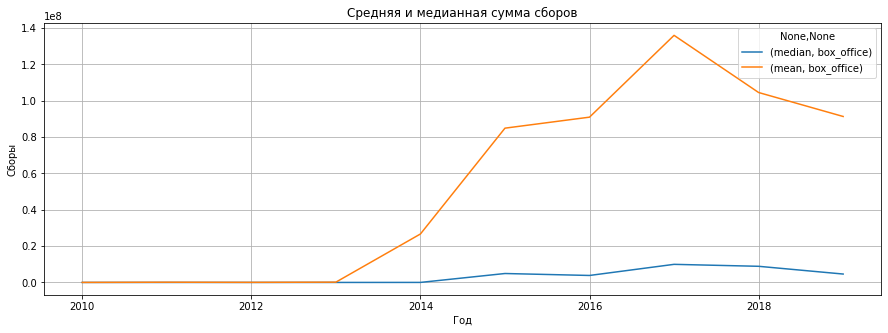

In [36]:
#Выводим среднюю и медианную сумму сборов
(
    mkrf_movies.pivot_table(index = 'year', values = 'box_office', aggfunc = ['median', 'mean'])
    .plot(title='Средняя и медианная сумма сборов', kind='line', grid = True, figsize=(15,5))
)
plt.xlabel('Год')
plt.ylabel('Сборы')
plt.show()

**Вывод:** 
- На графиках видно, что разброс большой; 
- Пиком можно считать 2017 год; 
- Причиной может быть то, что в данные периоды сборы были в разы больше, чем в другие периоды.

- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? 
- Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? 
- Меняется ли картина в зависимости от года?

<function matplotlib.pyplot.show(close=None, block=None)>

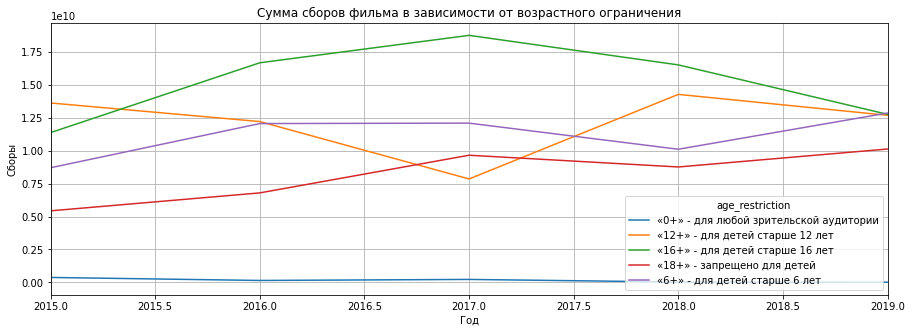

In [37]:
#Выводим сумму сборов фильма в зависимости от возрастного ограничения
(
    mkrf_movies[mkrf_movies['box_office'].notna()]
    .pivot_table(index = 'year', values = 'box_office', columns = 'age_restriction', aggfunc = 'sum')
    .plot(title = 'Сумма сборов фильма в зависимости от возрастного ограничения',xlim=[2015,2019], kind='line', grid = True, figsize=(15,5))
)
plt.xlabel('Год')
plt.ylabel('Сборы')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)> - Это ошибка или так и должно быть?

**Вывод:**
- Возрастное ограничение влияет на сборы фильма. На графике можно увидеть, что возрастное ограничение "16+" практичесски на всем промежутке выбранного времени имеет наибольший показатель сборов, наименьший же прокат у фильмов с возрастным ограничением "0+";
- Это может быть связано с тем, что в фильмах с ограничением "16+" могут появляться жесткие или немного пикантные сцены, которые привлекают зрителя, нежели фильмы с ограничением ниже по возрасту.

### Шаг 4. Исследуем фильмы, которые получили государственную поддержку


**Проверим, сколько выделяют средств на поддержку кино**

In [38]:
#Добавим новый столбец с объемами поддержки
df = mkrf_movies[mkrf_movies['budget'].isna() == False]
df['support_film'] = (df['refundable_support'])+(df['nonrefundable_support'])

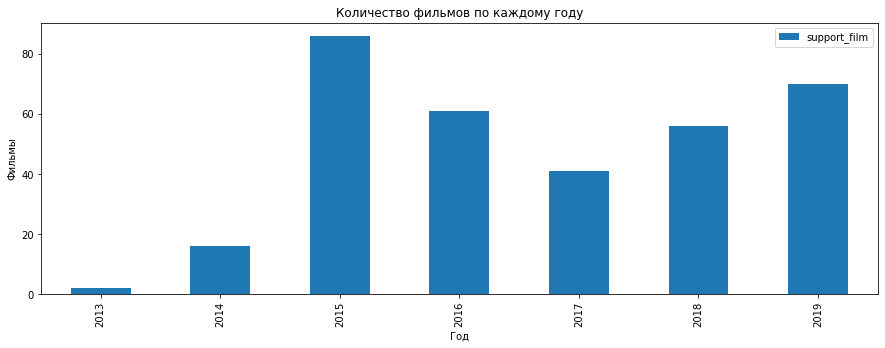

In [39]:
(
    df.pivot_table(index = 'year', values = 'support_film', aggfunc = 'count')
    .plot(title='Количество фильмов по каждому году', kind='bar', grid = False, figsize=(15,5))
)
plt.xlabel('Год')
plt.ylabel('Фильмы')
plt.show()

**Вывод:**
- Больше всего было выделено средств на поддержку кино в 2015 году; 
- В 2017 году было выделено меньше всего средств(2013 и 2014 не берем в учет, т.к. мало данных), но в следующих годах поддержка снова возрасла...Видимо, минкульту не понравились вышедшие фильмы в 2017 году).

**Проверим какие жанры больше всего получают гос.поддержку**

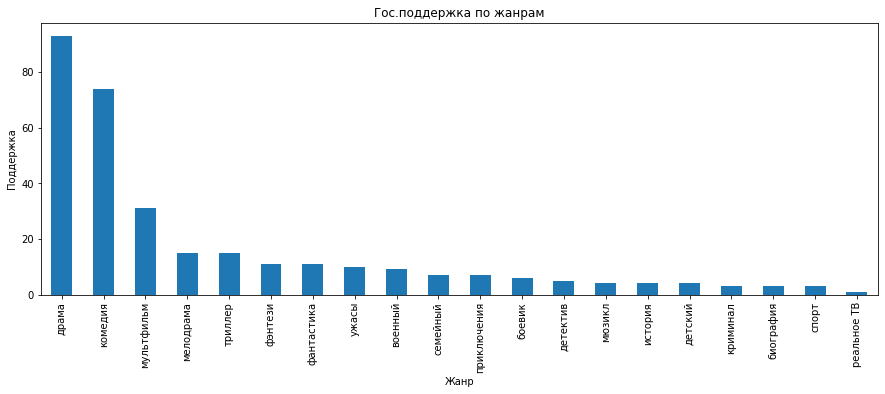

In [40]:
(
    df['col_genres']
    .value_counts()
    .plot(title='Гос.поддержка по жанрам', kind='bar', figsize=(15,5))
)
plt.xlabel('Жанр')
plt.ylabel('Поддержка')
plt.show()

**Вывод:** Превалирующую гос.поддержку выделяют фильмам с жанром "драма", остальным жанрам остается лишь завидовать.

**Проверим по рейтингу**

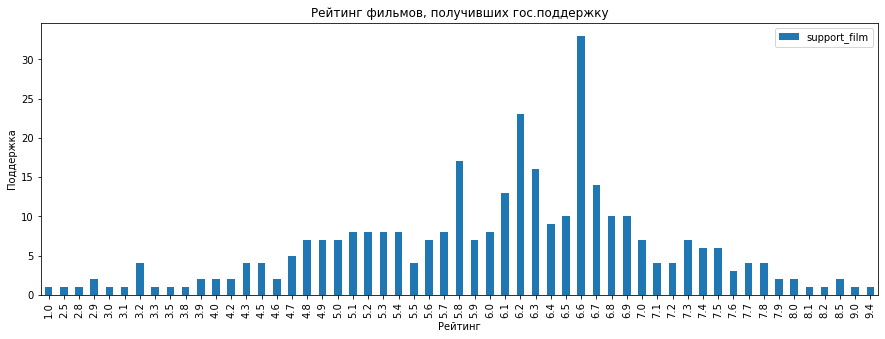

In [68]:
(
    df.pivot_table(index = 'ratings', values = 'support_film', aggfunc = 'count')
    .plot(title='Рейтинг фильмов, получивших гос.поддержку', kind='bar', grid = False, figsize=(15,5))
)
plt.xlabel('Рейтинг')
plt.ylabel('Поддержка')
plt.show()

**Вывод:** Большинство фильмов, получающих гос.поддержку имеют рейтинг 6.6, 6.2 и 5.8, остальные же с рейтингом ниже.

**Проверим какие фильмы с гос.поддержкой окупались, а какие нет**

In [42]:
#Добавим столбец с прибылью
df['profit'] = df['box_office'] / df['support_film'] - 1
#Добавим столбец с окупаемостью и не окупаемостью
df['payback'] = df['profit'] > 0 
df['unprofitability'] = ~df['payback']

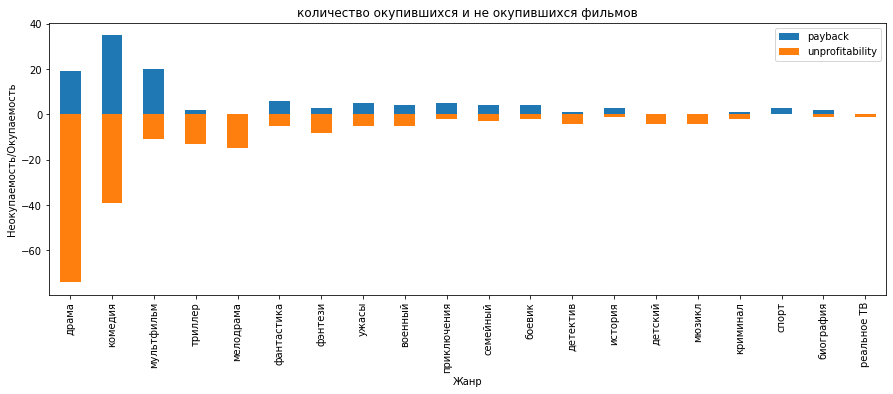

In [43]:
df.groupby('col_genres') \
            .agg({'title': 'count',
                  'payback': 'sum',
                  'unprofitability': lambda x: 0 - x.sum()}) \
            .sort_values(by='title',
                         ascending=False) \
            .plot(title='количество окупившихся и не окупившихся фильмов',
                  kind='bar',
                  stacked=True,
                  y=['payback', 'unprofitability'],
                  figsize=(15,5))
plt.xlabel('Жанр')
plt.ylabel('Неокупаемость/Окупаемость')
plt.show()

**Вывод:** По графику видно, что фильмы с жанром "драма" имеют большую долю неокупаемости, фильмы с жанром "комедия" в пограничном состоянии, "мультфильмы" же преобладают в доли окупаемости.

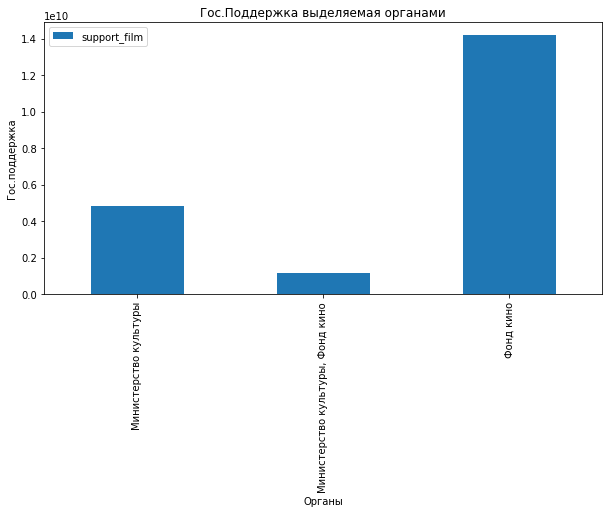

In [70]:
(
    df.pivot_table(index = 'financing_source', values = 'support_film', aggfunc = 'sum')
    .plot(title='Гос.Поддержка выделяемая органами', kind='bar', grid = False, figsize=(10,5))
)
plt.xlabel('Органы')
plt.ylabel('Гос.поддержка')
plt.show()

**Вывод:** По графику видно, что Фонд кино выделяет больше всего средств для поддержки фильмов.

### Шаг 5. Напишем общий вывод

1. **В данной работе были открыты и объеденены датасеты в один датафрейм:**
- Первый содержал основную информацию о фильме
- Второй содержал информацию о номерах прокатных удостоверений и сборах в рублях.

2. **Проведена предобратка данных:** проверены типы данных, изучены пропуски, проведена проверка на дубликаты, изучены столбцы с категориальными и количественными значениями и добавлены новые столбцы:
- В процессе предобработки были выявлены пропуски в данных, которые были заполнены правильными значениями.
- Также были обнаружены дубликаты, но при проверке выяснилось, что фильмы выпускали несколько раз в прокат и такие данные не стоит удалять
- В категориальных столбцах было замечено, что в данных присутствуют лишние пробелы, а также что некоторые данные(возрастная категория, жанр) повторяются, но с этим ничего нельзя поделать, т.к. это важная информация.
- В колличественных столбцах пустые значения были заменены на 0

3. **Проведен исследовательский анализ данных:** изучено, сколько фильмов выходило в пракат каждый год, исследовано как менялась динамика проката по годам, посчитаны медианные и средние суммы сборов, определено влияет ли возрастное ограничение на сборы.
- Наибольшее количество вышедших фильмов в 2019 году, наименьшее количество в 2010 году
- В период с 2010 по 2014 доля была наименьшая, в 2017 же наибольшая
- В 2010-2013 годах сумма сборов была минимальной, в 2018 году сумма сборов была максимальной
- Максимальная сумма сборов была в 2017 году(этому свидетельствуют данные на графике средней и медианной суммы)
- Наибольший показатель сборов имеют фильмы с возрастным ограничением "16+", наименьший "0+"

4. **Иссследовали фильмы по разным направлениям:**
- Больше всего выделено средств в 2015 году, меньше всего в 2017 году.
- Жанр "драма" имеет наибольшую гос.поддержку
- Большинство фильмов, получающих гос.поддержку имеют рейтинг 6.6, 6.2 и 5.8, остальные же с рейтингом ниже
- Фильмы с жанром "драма" имеют большую долю неокупаемости, фильмы с жанром "комедия" в пограничном состоянии, "мультфильмы" же преобладают в доли окупаемости
- Фонд кино выделяет больше всего средств для поддержки фильмов